<a href="https://colab.research.google.com/github/SNWambui/Capstone_Projects/blob/main/Text_Summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text Summarization and Keyword Extraction

The goal of this project is multi-part:
1. To get experience in outsourcing and collecting data for data related projects from the web. 
2. To explore natural language processing as a machine learning technique as we did not cover this in class
3. To set up the foundation in learning more about agriculture in Kenya, common topics and conditions for a set of crops in support of my capstone.
4. To make use of pretrained models in addition to building new models for language processing.

## Web Scraping and Data consolidation

With the goal being to learn about data collection methods, I am going to scrape data from a few websites that have agricultural content about crops and compile them into one file or multiple files depending on the content. The other reason is that there is not a well consolidated and accessible dataset of farming conditions in Kenya. Rather, there are several websites that either have paragraphs or list the conditions out in paragraphs. I will use BeautifulSoup which is a common scraping tool that allows various web formats. The documentation, found [here](https://beautiful-soup-4.readthedocs.io/en/latest/) is very detailed. Note that one needs to install beautifulsoup and requests locally to run it

### Importing Necessary Modules

In [ ]:
# !pip3 install beautifulsoup4
# !pip3 install requests
# !pip3 install lxml
# !pip3 install icecream

In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re
import requests
import seaborn as sns
from icecream import ic

In [ ]:
sns.set_theme()

Every website has it's own structure and therefore it is important to visit the website, know what you are looking for, inspect the elements and get the respective HTML/XML tags. Since most websites use HTML to display static contents, it becomes relatively easy to get the content so long as it is publicly rendered. Beautifulsoup makes the process seamless.

I will use only three websites with the aim of only getting information about maize as a factor of time and scope of the assignment. Maize is a staple food in Kenya and so it makes sense to start with it. The idea is that eventually, enough data on the main crops in Kenya can be added to a database and the key topics can emerge. This can then be used to provide recommendations to farmers as there is evidence for success:
1. The first website contains information on growing conditions for maize in Kenya. 
2. The second website contains information on general cash crop growing and is an education site target to students.
3. The third website contains very detailed information on everything to know about maize

For the first website, the content is rather short and therefore getting all the content that is in paragraphs. 

In [ ]:
# define the url to get the content from
url1 = "https://www.koppert.co.ke/news/some-tips-for-maize-production-in-challenging-times/#:~:text=Fertile%2C%20well%20drained%2C%20well%20aerated,pH%206.0%E2%80%936.5%20being%20optimal."

# send a request to get contents from the url
maize1 = requests.get(url1)

# use lxml in case pages are not correctly formatted as per HTML standards
soup1 = BeautifulSoup(maize1.content, 'lxml')

# get the content in the div with the paragraphs, and each paragraph
parags = soup1.find('div', class_ = 'c-news__bodytext').find_all("p")


In [ ]:
# create a dataframe to story any scapred data
df_all = pd.DataFrame(columns=['Crops', 'Website', 'Link', 'Content'])

# get each of the paragraphs within the div, add them to a list with the crop name
# and display the paragraphs
lst1 = []
for p in parags:
    lst1.append(p.get_text())
    
# combine the paragraphs into one paragraph and remove weird characters
cont = ' '.join(lst1).replace('\xa0', '')
df_all.loc[0] = ['Maize', 'Koppert', url1, cont]

In [ ]:
df_all

,Crops,Website,Link,Content
0,Maize,Koppert,https://www.koppert.co.ke/news/some-tips-for-m...,The Kenya Meteorological Department has predic...


For the second website, I am only interested in the paragraph that talks about maize conditions. It does not follow updated website standards and therefore finding the exact content will require a bit more manual filtering and using 'html.parser' rather than XML. I had to do quite a bit of inspecting the HTML elements, loop through all the paragraphs and find the ones where the start talking about maize.

In [ ]:
# url to get content from
url2 = "https://learn.e-limu.org/topic/view/?c=48&t=272"

# send a request to get contents from the url
maize2 = requests.get(url2)

# use lxml in case pages are not correctly formatted as per HTML standards
soup2 = BeautifulSoup(maize2.content, 'html.parser')

# get the content in the div with the paragraphs, and each paragraph
parags2 = soup2.find_all('p')

text = 'Maize growing in'
for i in parags2:
    if text in i.text:
        maize_text = i.text
print(maize_text)

Cotton growing in Kenya
Cotton is grown to produce cotton balls. Conditions necessary for growing cotton;

Moderate rainfall.
An average temperature of 27ºC. 
Fertile and well drained black cotton soil. 
A dry spell for ripening and harvesting. A lot of rain destroys the cotton balls.

The main cotton growing areas in Kenya are Siaya, Homa Bay, Tana river and Machakos.

Uses of cotton
a) It is used in textile industries to make clothes, blankets and towels.
b) It is used in hospitals when dressing wounds.
c) Cotton stalks are used as fi rewood.
d) Cotton stalks and leaves are used in compost heaps to make manure.
Factors influencing the growing of cash crops

The type of soil.
Availability of labour.
A,mount of rainfall received
Temperatures of a place
Absence of pests and diseases.
Topography.
Availability of capital
Good transport network.

Maize growing in Kenya and Tanzania
Maize is an important food crop in Eastern Africa. However, in some areas, it is grown as a cash crop. Maize 

In [ ]:
# slice out anything that comes before the first instance of maize in the text
maize_text = maize_text[maize_text.find('Maize'):]

# delete strange characters
maize_text = maize_text.replace('\xa0', '')

# add the contents of the new website to the dataframe
df_all.loc[1] = ['Maize', 'Elimu', url2, maize_text]

The output above is a good example of how even with webscraping, you still need to do cleaning to get the exact content we need because people do not follow the same practices for organizing content. The only important sections are the ones that come after "Conditions for growing maize". Everything else can be deleted. While it is possible to delete

For the third website, there is a lot more content. This is the type of website that a farmer would like to get summaries from. Given the scope of the assignment, I will only take 4 sections that all appear in one div but have a lot of information. An extension to this would be to get all the data and use that to summarize. Unlike the other two websites, I will not display the entire contents of this website throughout the paper because of the length. However, I will show the length and snapshots. 

In [ ]:
# url to get content from
url3 = "https://infonet-biovision.org/PlantHealth/Crops/Maize"

# send a request to get contents from the url
maize3 = requests.get(url3)

# use lxml in case pages are not correctly formatted as per HTML standards
soup3 = BeautifulSoup(maize3.content, 'html.parser')

# get the content in the div with the paragraphs, and each paragraph
parags3 = soup3.find('div', 
                     class_="field field-name-field-main-content-block-phcfv field-type-text-long field-label-hidden").find_all(lambda tag: tag.name != 'table' and tag.name=='p')

In [ ]:
# get each of the paragraphs within the div, add them to a list with the crop name
# and display the paragraphs
lst3 = []
for p in parags3:
    lst3.append(p.get_text())

lst3 = ''.join(lst3)
df_all.loc[2] = ['Maize', 'Infornet', url3, lst3]

In [ ]:
df_all

,Crops,Website,Link,Content
0,Maize,Koppert,https://www.koppert.co.ke/news/some-tips-for-m...,The Kenya Meteorological Department has predic...
1,Maize,Elimu,https://learn.e-limu.org/topic/view/?c=48&t=272,Maize growing in Kenya and Tanzania\nMaize is ...
2,Maize,Infornet,https://infonet-biovision.org/PlantHealth/Crop...,Maize is the most important cereal crop in sub...


In [ ]:
print(len(df_all['Content'][1]))
print(len(df_all['Content'][2]))

2564
20678


As previously indicated, the third website has significantly more content as can be seen by the number of characters in the website.

## Topic Modeling

Topic Modeling is essentially trying to find out what are the key topics in a given document based on the content of the document. There are several methods to topic modeling including LDA, TFIDF and Deep Learning. I will use LDA and TFIDF. LDA (Latent Dirichlet Allocation) is a generative probabilistic method that uses Dirichlet distributions to determine the topics prsent based on the document and the words. Document here refers to a sentence rather than an entire document. The idea of LDA is to assume an initial random distribution of topics in documents, documents have a mixture of topics and topics are a mixture of words. Then, by creating a document-topic matrix and topic-word matrix, each word in vector representation is initially assigned a latent (hidden) topic. The algorithm then iterates over the documents and words and generates topics then iterates again to find out what words would have generated the topics and what topics would have generated the documents. At each iteration, a probability is assigned so that a given topic has a given probability of being generated. One can then get the top x topics. The preprocesing steps for the algorithm are:
1. Tokenization. This refers to splitting sentences into the simplest forms that is words and phrases
2. Removing stop words. Stop words are words that are useful for semantic reasons but do not add meaning to the text eg 'the', 'a', 'and'
3. Word lemmatization. This is changing all third person to first person and all tenses to present tense.
4. Word stemming. Reducing words to their root words. 

Term Freqeuency Inverse Documemnt Frequency (TF IDF) is a more simplistic approach that refers to how many times a word appears in a document and how important it is as measured by the share of sentences with the word in it. For keyword search with TFIDF, we need to process the text in slightly different steps:
1. Tokenization. 
2. Removing stop words.
3. Calculating Term Frequency. This will count how many times a word appears in the text
4. Calculting IDF. This will check the share of each word in the sentences

Note that because we are not using any mathematical representation of the words in TFIDF, we do not need to stem or lemmatize the words especially because we need to find them as they are. 



### TFIDF

In [ ]:
# !pip3 install gensim

In [ ]:
from operator import itemgetter
import math
import matplotlib.pyplot as plt

import nltk
# for removing stopwords and tokenizing words
nltk.download('stopwords')

# for dealing with punctuations
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# remove stop words from sentences 
stop_words = set(stopwords.words('english'))

In [ ]:
# plot the distribution of words

In [ ]:
def n_words(text, n=-1):
    '''Function to get n number of tokenized words from a given blob of text
    Input:
     str (text): Text to be tokenized
     int (n): number of words to return after tokenizing text
     default: -1, shows all the sentences
    Output:
     str: n number of tokenized words
    '''
    token_words = word_tokenize(text.lower())[:n]
    for word in token_words:
        word.replace("[^a-zA-Z]"," " )
    return token_words

In [ ]:
# for computing TF, get all the words, third website
total_words1 = n_words(df_all["Content"][0])
word_length1 = len(total_words1)
print(f"Total number of words is : {word_length1}")
print(f"last 10 words: {total_words1[668:]}")

Total number of words is : 678
last 10 words: ['opportunity', 'to', 'wish', 'all', 'maize', 'farmers', 'a', 'highly', 'productive', 'season']


In [ ]:
# for computing TF, get all the words, second website
total_words2 = n_words(df_all["Content"][1])
word_length2 = len(total_words2)
print(f"Total number of words is : {word_length2}")
print(f"last 10 words: {total_words2[512:]}")

Total number of words is : 522
last 10 words: ['or', 'stored', 'as', 'reserve', 'for', 'use', 'in', 'times', 'of', 'famine']


In [ ]:
# for computing TF, get all the words, third website
total_words3 = n_words(df_all["Content"][2])
word_length3 = len(total_words3)
print(f"Total number of words is : {word_length3}")
print(f"last 10 words: {total_words3[3786:]}")

Total number of words is : 3796
last 10 words: ['field', 'and', 'then', 'used', 'as', 'fodder', ',', 'fuel', ',', 'etc']


In [ ]:
def n_sentens(text, n=-1):
    '''Function to get n number of tokenized sentences from a given blob of text
    n=-1 to see all the sentences.
    Input:
        str (text): Several sentences to be tokenized
        int (n): number of sentences to return after tokenizing text
            default: -1, shows all the sentences
    Output:
        str (sent_print): n number of tokenized sentences for print display
        array (token_sent): list with n number of tokenized sentences
    '''
    
    token_sent = sent_tokenize(text)[:n]
    for sent in token_sent:
        sent.replace("[^a-zA-Z]"," " )
    sent_print = "\n".join(sent_tokenize(text)[:n])
    return token_sent, sent_print

In [ ]:
token_sent10, print_sent10 = n_sentens(df_all["Content"][0],10)

In [ ]:
print(f"First 10 sentences:\n{print_sent10}")

First 10 sentences:
The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.
As a result, the long rains growing season that usually starts in March and ends in May will be delayed.
Whether this is just a cyclical pattern or the result of climate change is a subject for a separate debate.
The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields.
Maize is undoubtedly the primary staple food in Kenya.
Any factor that influences maize yields is therefore of key concern to farmers.
Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production.
Firstly, the farmer needs to understand their agro ecological zone.
This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.
At this junctur

In [ ]:
# for computing IDF,  get all the sentences
total_sent1, print_total_se = n_sentens(df_all["Content"][0])
sent_length1 = len(total_sent1)
print(f"Total number of sentences is : {sent_length1}")

Total number of sentences is : 36


In [ ]:
# second website
# for computing IDF,  get all the sentences
total_sent2, print_total_se2 = n_sentens(df_all["Content"][1])
sent_length2 = len(total_sent2)
print(f"Total number of sentences is : {sent_length2}")
print(f"First 10 sentences: {total_sent2[:9]}")

Total number of sentences is : 35
First 10 sentences: ['Maize growing in Kenya and Tanzania\nMaize is an important food crop in Eastern Africa.', 'However, in some areas, it is grown as a cash crop.', 'Maize was introduced to Kenya by Portuguese.', 'It is mainly produced on small farms, which vary in size from a quarter hectare to about fi ve hectares.', 'In some cases it is grown on large plantations.', 'Conditions necessary for growing maize\na) Over 500 mm of rainfall.', 'Therefore, it does not do well in desert and semi-desert\nareas.', 'b) Maize does not do well in highland areas above 2 200 metres where temperatures are very low.', 'In such areas, maize grows very slowly and takes more than six months to mature.']


In [ ]:
# third website
# for computing IDF,  get all the sentences
total_sent3, print_total_se3 = n_sentens(df_all["Content"][2])
sent_length3 = len(total_sent3)
print(f"Total number of sentences is : {sent_length3}")
print(f"First 10 sentences: {total_sent3[:9]}")

Total number of sentences is : 159
First 10 sentences: ['Maize is the most important cereal crop in sub-Saharan Africa.', 'It is a staple food for an estimated 50% of the population.', 'It is an important source of carbohydrate, protein, iron,\xa0vitamin B, and minerals.', 'Africans consume maize in a wide variety of ways (maize meal, porridges, pastes and beer).', 'Green maize, fresh on the cob, is eaten baked, roasted or boiled.', 'Every part of the maize plant has economic value: the grain, leaves, stalk, tassel, and cob can all be used to produce a large variety of food and non-food products.', 'In sub-Saharan Africa maize is mostly\xa0grown by small-scale farmers, generally for subsistence as part of mixed agricultural systems.', 'The systems often lack inputs such as fertiliser, improved seed, irrigation, and labour.', 'According to FAO data, Africa produced 7.4% of the 1, 135 million tonnes produced worldwide in 40 million hectares in 2017 (FAOSTAT, 2017).']


#### Plotting Total Words 

Before computing the tf and IDF scores, we can plot the frequency distribution of total tokenized words. These will contain stop words and punctuation marks which are removed in computing the TF IDF

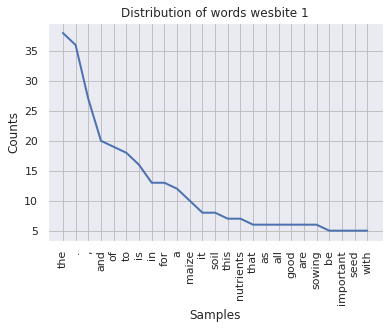

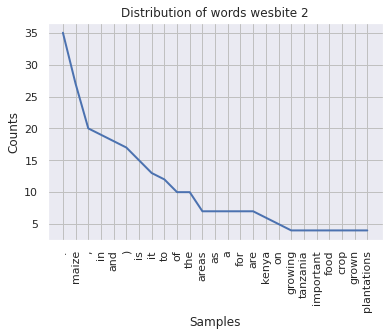

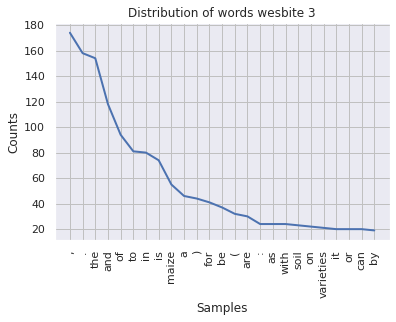

In [ ]:
# Figures inline
%matplotlib inline

# Create freq dist and plot
freqdist1 = nltk.FreqDist(total_words1)
freqdist2 = nltk.FreqDist(total_words2)
freqdist3 = nltk.FreqDist(total_words3)
freqdist1.plot(25, title='Distribution of words wesbite 1')
freqdist2.plot(25, title='Distribution of words wesbite 2')
freqdist3.plot(25, title='Distribution of words wesbite 3');

It is evident that to get a better representation, stop words and punctuations need to be removed. 

In [ ]:
# computing the tf score
def compute_tf_score(tot_words):
    '''
    Function to compute the term frequency score for the words
    Input:
        arr (tot_words): list of the tokenized words generated
    Output:
        dict (tf_score): key/value pair of word and it's tf score
    '''
    # empty dict to store the term frequency score
    tf_score = {}

    # loop through, remove all punctuations
    for word in tot_words:
        word = word.replace('.','')
        word = word.replace(',','')
        word = word.replace('’','')
        word = word.replace('‘','')

        # if the word in a stop word, 
        # then get it's tf_score and add it to the dict
        if word not in stop_words:
            if word in tf_score:
                tf_score[word] += 1
            else:
                tf_score[word] = 1
                
    # divide by word_len for each dic element
    word_len = len(tot_words)
    tf_score.update((x, y/int(word_len)) for x, y in tf_score.items())
    return tf_score

# tf score for the first website
tf_score1 = compute_tf_score(total_words1)
print(list(tf_score1.items())[:5])

[('kenya', 0.0029498525073746312), ('meteorological', 0.0014749262536873156), ('department', 0.0014749262536873156), ('predicted', 0.0014749262536873156), ('current', 0.0014749262536873156)]


In [ ]:
# tf score for the second website
tf_score2 = compute_tf_score(total_words2)
print(list(tf_score2.items())[:5])

[('maize', 0.05172413793103448), ('growing', 0.007662835249042145), ('kenya', 0.011494252873563218), ('tanzania', 0.007662835249042145), ('important', 0.007662835249042145)]


In [ ]:
# tf score for the third website
tf_score3 = compute_tf_score(total_words3)
print(list(tf_score3.items())[:5])

[('maize', 0.014488935721812434), ('important', 0.0015806111696522655), ('cereal', 0.00026343519494204424), ('crop', 0.004214963119072708), ('sub-saharan', 0.0005268703898840885)]


In [ ]:
# combining words from all websites
total_words_all = total_words1 + total_words2 + total_words3

In [ ]:
# tf score for the all website
tf_score_all = compute_tf_score(total_words_all)
print(list(tf_score_all.items())[:5])

[('kenya', 0.0034027221777421937), ('meteorological', 0.00020016012810248197), ('department', 0.00020016012810248197), ('predicted', 0.00020016012810248197), ('current', 0.00020016012810248197)]


In [ ]:
# calculating IDF

def check_sent(word, sentences): 
    '''Function to compute the number of sentences with given a word
    Input:
        str (word): word to check
        str (sentence): sentence to check word
    Output:
        int (sent_len): number of sentences with the word in it
        '''
    final = [all([w in x for w in word]) for x in sentences] 
    sent_len = len([sentences[i] for i in range(0, len(final)) if final[i]])
    return int(sent_len)

In [ ]:
from pandas.core.indexers import check_key_length
from string import punctuation
# computing the idf score
def compute_idf_score(tot_words, tot_sent):
    '''
    Function to compute the inverse document frequency score for the words
    Input:
        arr (tot_words): list of the tokenized words generated
        arr (tot_sent): list of all the tokenized sentences
    Output:
        dict (idf_score): key/value pair of word and it's tf score
    '''

    # initialize empty dict to compute IDF
    idf_score = {}

    # remove punctuations for all the words
    for word in tot_words:
        word = word.replace('.','')
        word = word.replace(',','')
        word = word.replace('’','')
        word = word.replace('‘','')
        word = word.replace('(','')
        word = word.replace(')','')
        
        # if the word is not a stop_word, compute the IDF score and append to dict
        if word not in stop_words:
            if word in idf_score:
                idf_score[word] = check_sent(word, tot_sent)
            else:
                idf_score[word] = 1

    # get the length of the list of sentences
    sent_len = int(len(tot_sent))
    
    # Performing a log and divide
    idf_score.update((x, math.log(sent_len/y)) for x, y in idf_score.items() if y>0)

    return idf_score

# idf score for first website
idf_score1 = compute_idf_score(total_words1, total_sent1)
print(list(idf_score1.items())[:5])

[('kenya', 2.8903717578961645), ('meteorological', 3.58351893845611), ('department', 3.58351893845611), ('predicted', 3.58351893845611), ('current', 3.58351893845611)]


In [ ]:
# idf score for second website
idf_score2 = compute_idf_score(total_words2, total_sent2)
print(list(idf_score2.items())[:5])

[('maize', 0.5108256237659907), ('growing', 0.9162907318741551), ('kenya', 3.5553480614894135), ('tanzania', 0.4643056081310978), ('important', 0.7827593392496325)]


In [ ]:
# idf score for third website
idf_score3 = compute_idf_score(total_words3, total_sent3)
print(list(idf_score3.items())[:5])

[('maize', 0.9580303380469203), ('important', 0.35040533092513704), ('cereal', 5.0689042022202315), ('crop', 0.3153140111138668), ('sub-saharan', 1.667706820558076)]


In [ ]:
# compute tfidf
tf_idf_score1 = {key: tf_score1[key] * idf_score1.get(key, 0) for key in tf_score1.keys()}
print(list(tf_idf_score1.items())[:5])

[('kenya', 0.008526170377274822), ('meteorological', 0.005285426162914616), ('department', 0.005285426162914616), ('predicted', 0.005285426162914616), ('current', 0.005285426162914616)]


In [ ]:
# compute tfidf
tf_idf_score2 = {key: tf_score2[key] * idf_score2.get(key, 0) for key in tf_score2.keys()}
print(list(tf_idf_score2.items())[:10])

[('maize', 0.02642201502237883), ('growing', 0.0070213849185759005), ('kenya', 0.04086606967229211), ('tanzania', 0.0035578973803149254), ('important', 0.0059981558563190224), ('food', 0.0032172708472050886), ('crop', 0.0070213849185759005), ('eastern', 0.006811011612048685), ('africa', 0.006811011612048685), ('', 0.0)]


In [ ]:
# compute tfidf
tf_idf_score3 = {key: tf_score3[key] * idf_score3.get(key, 0) for key in tf_score3.keys()}
print(list(tf_idf_score3.items())[:10])

[('maize', 0.013880839987508066), ('important', 0.00055385457996597), ('cereal', 0.0013353277666544338), ('crop', 0.0013290369277718305), ('sub-saharan', 0.0008786653427597871), ('africa', 0.0007132272986491262), ('', 0.0), ('staple', 0.0013353277666544338), ('food', 0.00024919442395721824), ('estimated', 0.0001526768751889895)]


#### Top n Words

Now that we have the computed the term frequency and inverse document frequency, we can see which are the top words per website and see if any new patterns emerge. We can plot them for better visualization and even have a wordcloud to visually represent them better.

In [ ]:
def get_top_n(tfidf_score, n):
    '''Function to get the top n words/important words
    Input:
        dict (dict_elem): dictionary containing tf_idf_scores
        int (n): number of top words to get
    Output:
        dict: the top n words by their tfidf scores
        
    '''
    result = dict(sorted(tfidf_score.items(), key = itemgetter(1), reverse = True)[:n]) 
    return result

In [ ]:
# get the top n number of words for first website
topn1 = get_top_n(tf_idf_score1, 15)

# get the top n number of words for second website
topn2 = get_top_n(tf_idf_score2, 15)

# get the top n number of words for second website
topn3 = get_top_n(tf_idf_score3, 15)

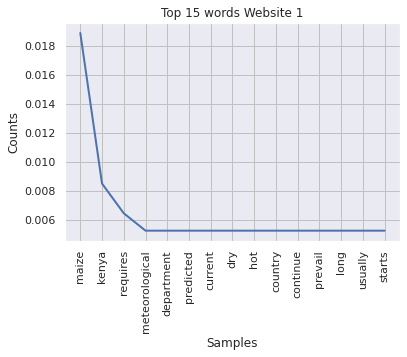

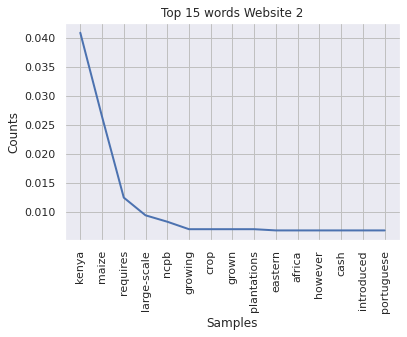

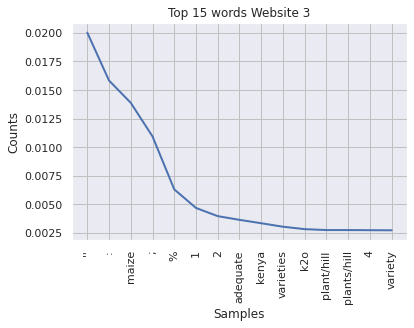

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(topn1)
freqdist2 = nltk.FreqDist(topn2)
freqdist3 = nltk.FreqDist(topn3)
freqdist1.plot(title='Top 15 words Website 1', )
freqdist2.plot(title='Top 15 words Website 2')
freqdist3.plot(title='Top 15 words Website 3');

In [ ]:
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(20, 10))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
#!pip3 install wordcloud
from wordcloud import WordCloud, STOPWORDS


In [ ]:
# get the top x number of words
top_x1 = [i for i in topn1.keys()]

# Generate word cloud
wordcloud1 = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(top_x1))

In [ ]:
# get the top x number of words)
top_x2 = [i for i in topn2.keys()]

# Generate word cloud
wordcloud2 = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Paired', 
                      collocations=False, stopwords = STOPWORDS).generate(str(top_x2))

In [ ]:
# get the top x number of words)
top_x3 = [i for i in topn3.keys()]

# Generate word cloud
wordcloud3 = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(str(top_x3))

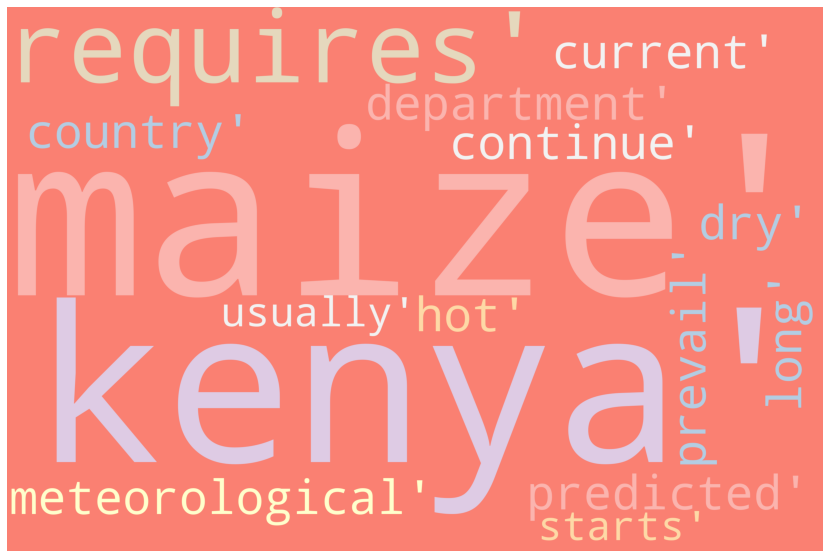

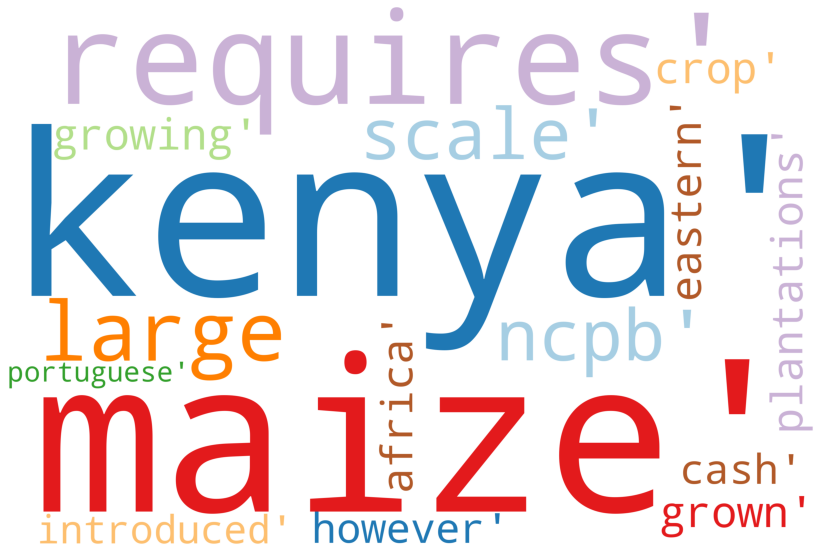

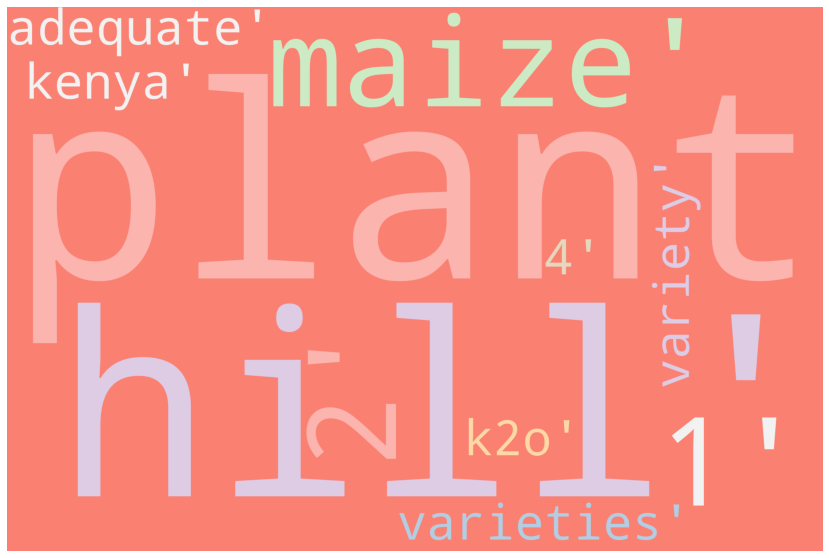

In [ ]:
plot_cloud(wordcloud1)
plot_cloud(wordcloud2)
plot_cloud(wordcloud3)

Unsurprisingly, Kenya and maize are among the top words in the websites. An interesting observation is that 'requires' is also a top word which means that we can use this as a basis to extract useful summary using requires as a keyword. It may be used to directly refer to the crop requirements. 

### LDA

For this use case, I use a bag of words which checks the number of times a word appears in the training set documents.

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

np.random.seed(2018)
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemma_stem(text):
    '''Function to lemmatize and stem words:
    Input:
        str (text): the word to be stemmed and lemmatized
    Output:
        str: the lemmatized word    
    '''
    ps = PorterStemmer()
    return ps.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def preprocess(text):
    '''Function to preprocess words for lda model
    Input: 
        str (text): word to preprocess
    Output:
        str : preprocessed word
    '''
    # empty list to store the words after preprocessing them
    result = []

    # loop through each word, check if it is not a stop word and it is at least 
    # 3 or more letter. Stem and lemmatize the word
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2:
            result.append(lemma_stem(token))
    return result

In [ ]:
processed_words= []

# preprocess the words
for i in total_words1:
    processed_words.append(preprocess(i))
processed_words[:5]

[[], ['kenya'], ['meteorolog'], ['depart'], []]

In [ ]:
# generate a bag of words from the preprocessed data
dictionary = gensim.corpora.Dictionary(processed_words)

# filter out tokens that are at least in 10 sentences or in 
# not more that 0.5 of corpus size
dictionary.filter_extremes(no_below=10, no_above=0.5, keep_n=100000)

# for each document, report how many words and how many times per sentence
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_words]

In [ ]:
# train lda on bag of words
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=10, 
                                       id2word=dictionary, passes=2, workers=2)

In [ ]:
# print out the main topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.718*"nutrient" + 0.282*"maiz"
Topic: 1 
Words: 0.954*"maiz" + 0.046*"nutrient"
Topic: 2 
Words: 0.960*"maiz" + 0.040*"nutrient"
Topic: 3 
Words: 0.817*"nutrient" + 0.183*"maiz"
Topic: 4 
Words: 0.500*"nutrient" + 0.500*"maiz"
Topic: 5 
Words: 0.976*"nutrient" + 0.024*"maiz"
Topic: 6 
Words: 0.917*"maiz" + 0.083*"nutrient"
Topic: 7 
Words: 0.969*"maiz" + 0.031*"nutrient"
Topic: 8 
Words: 0.983*"nutrient" + 0.017*"maiz"
Topic: 9 
Words: 0.935*"maiz" + 0.065*"nutrient"


The stemming and lemmatization has left some of the words not very legible. All the same, we can see that nutriwnts, fertile, yield, dress, farmer are among the key topics in the first website. Similarly we can repear the same for the other websites and see what are the key topics. I will instead used all the words from all the websites and see the themes that spread across them.

In [ ]:
# all the words
processed_words_all = []

# preprocess the words
for i in total_words_all:
    processed_words_all.append(preprocess(i))

# generate a bag of words from the preprocessed data
dictionary1 = gensim.corpora.Dictionary(processed_words_all)

# filter out tokens that are at least in 10 sentences or in 
# not more that 0.5 of corpus size
dictionary1.filter_extremes(no_below=5, no_above=0.8, keep_n=100000)

# for each document, report how many words and how many times per sentence
bow_corpus1 = [dictionary1.doc2bow(doc) for doc in processed_words_all]

# train lda on bag of words
lda_model1 = gensim.models.LdaMulticore(bow_corpus1, num_topics=10, 
                                       id2word=dictionary1, passes=2, workers=2)

In [ ]:
# print out the main topics
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.718*"nutrient" + 0.282*"maiz"
Topic: 1 
Words: 0.954*"maiz" + 0.046*"nutrient"
Topic: 2 
Words: 0.960*"maiz" + 0.040*"nutrient"
Topic: 3 
Words: 0.817*"nutrient" + 0.183*"maiz"
Topic: 4 
Words: 0.500*"nutrient" + 0.500*"maiz"
Topic: 5 
Words: 0.976*"nutrient" + 0.024*"maiz"
Topic: 6 
Words: 0.917*"maiz" + 0.083*"nutrient"
Topic: 7 
Words: 0.969*"maiz" + 0.031*"nutrient"
Topic: 8 
Words: 0.983*"nutrient" + 0.017*"maiz"
Topic: 9 
Words: 0.935*"maiz" + 0.065*"nutrient"


An interesting and unexpected observation. Across all the websites, the only major theme other than maize is nutrients. Maybe this can point to how important the nutrients that go into the soil are or it may be the nutrients from the plants. I changed the `.filter_extremes` values but the main topics remain.

## Summarization

With summarization being a relatively new area of machine learning, there is no one fits all model that can summarize text best. This is a general text in machine learning where though certain algorithms/models are known to work well for certain situations, it is always a good idea to try different algorithms that also work to see which is best. Therefore I will try several models and check their summarization.

The second problem with summarization is that it's harder to compute metrics because we are comparing a summary to the original text. This is where `rouge_score` comes in handy. In an ideal situation, we would have a human generated summary of the text and compare that to the ML generated summary. The `rouge_score` on these two summaries would compare the precision, recall and f1 and determine how close the model came to providing a succint summary. For this case however, we do not have a human generated summary. Instead, we can get the first and last two tokenized sentences of the unsummarized text and compare that with the fast and last two sentences of the summary given that they are similar sentences. We can then use this score to check which model performs best. 

For the best performing model, I am curious to see the difference in summarization for entire paragraphs vs tokenized sentences. My suspicion is that entire paragraph summarization will have a better flow to a reader. Ideally, I should also tune the hyperparameters of the best performing model but given the nature of summarization, there isn't a perfect summary even with the `rouge_score`.

There are two types of summarizations I am interested in:
1. Abstractive Summarization: This type of summarization, as the name suggests, gives an abstract of the text and may include rewriting some of the text to be less verbose and more coherent. This is useful to someone who wants to get a basic gist of what the website content is
2. Extractive Summarization: This type of summarization is useful for extracting the most useful pieces of information from text. It can be based on getting the text with the most common non-stop words or getting text with specific keywords. This is useful when someone is looking for specific things such as the temperature for a given crop.

### Abstractive Summarization

Anyone who has done anything related to abstractive text summarization knows that one of the very first go to approaches is to use the Encoder-Decoder LSTM (Long Short Term Memory) model which is a type of Recurrent Neural Network. Specifically, they make use of encoders and decoders to understand text and provide summaries. The encoders work by having an internal, often vector, representation of words that is fed into the neural network to obtain a summary based on analysis of words one by one. It therefore 'remembers' whether a word is important or not based on the connections between the previous state. Under the hood, it uses the markov chain concept and words that are kept in the sequence are determined by a probability of importance based on their dependencies. The Network then keeps a memory of this dependencies over many words and therefore is long-term. The decoder on the other hand takes the output of the network and using a mapping based on the encoder, converts the internal vector representation back into text that is legible. The limitation of the LSTM is that it is sequential and only checks the importance of words sequentially. This means that it does not get the context of the entire sentence at a go. An additional step of using Attention helps to try and resolve this (I discuss more on attention below). Additionally, it works best if it has reference point of an expected summary to produce.

With that said, we want people to get useful summaries and we are scraping data which does not have prewritten summaries. Therefore I will use Transformers with pretrained models. Transformers are a clever adaptation of the LSTM models described above. They make use of convolutional neural networks, self-attention and encoder-decoders to give a coherent summary that maintains the message fo the text. Internally, transformers have encoders and decoders that work in tandem with self-attention layers. The self-attention is a property that is multi-step that allows embedding of words into vectors, determining the importnace of words not just as dependent on the previous word but as a component of the entire sentence. This non-sequential factor allows the vectorized words to be assigned a score of importance and given a probability that determines whether or not it is relevant. This works in parallel across sentences to determine which words have clear significance so that they can be decoded and returned as output in a new paraphrased summary. Lastly, they use positional encodings which gives information about the relationship between words based on their positions in the vector space represenation and consequently in the document. Just like the objective of the abstractive summarization, my discussion of how LSTM, BERT and Transformers is an abstract in itself and leaves out a lot details but delivers the key ideas of the models. 

Another important thing to note is that for LSTM, I would define the neural networks, encoders and decoders from scratch ie with keras while for Transformers, I will use pre-trained models. 

I will use the following transformers:
1. BERT: this is bidirectional encoder representations from transformers. It is the fundamental definition of transformers. While bidirectional may imply it reads text left to right then right to left, it actually means that it is non-directional, that is it reads the entire sequence of words at a go. This makes it good for summarization.  
2. GPT2: this is Generative Pre-trained Transformer 2. It is mainly for text generation based on the previous context of the words in the sequence. It works for abstractive summarization because we want to generate a new shorter summary that captures the essence of text based on the context.
3. XLNet: this is a model built to overcome limitations found in BERT. Specificaly it is auto-regressive rather than auto-encoding which means that unlike BERT which corrupts by masking and ignores the dependency between the masked positions, XLNet uses regression in an elegant way to allow previous time steps to be used in the prediction of the next value.


I considered using BART which is a generalization of BERT and GPT2 pretrained on CNN news articles with the intention of providing summaries by the model learning to reconstruct the original text. However, the model is very very large and takes up a lot of RAM.

Lastly, because of being trained on a lot of documents and being refined by many researchers, the fine-tuned models can take entired paragraphs without tokenization and generate very good summaries.

In [ ]:
# !pip3 install spacy -U
# !pip3 install Sentencepiece -U
# !pip3 install huggingface transformers -U
# !pip3 install transformers
# !pip3 install bert-extractive-summarizer -U
# !pip3 install torch -U

In [ ]:
from summarizer import Summarizer, TransformerSummarizer

In [ ]:
content1 = df_all['Content'][0]
content2 = df_all['Content'][1]
content3 = df_all['Content'][2]

In [ ]:
from transformers import pipeline 

In [ ]:
# website 1
# empty list to store the summaries 
bert_list1 = []

# initialize pretrained model default is bert-large-uncased
bert_model1 = Summarizer()

# train on and get the summary of the text with minimum length of 60
bert_summary1 = ''.join(bert_model1(str(total_sent1), min_length=60))

# add the generaed summaries to the list.
bert_list1.append(bert_summary1)

# display the summary
bert_summary1

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


"['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.', ' At this juncture, the farmer needs to understand the soil characteristics prevalent in their field.', ' Maize is a nutrient intensive and requires adequate supplies of all nutrients for all growth stages.', ' Soil testing helps establish the available nutrients and the remedial steps that need to be undertaken in case of deficiencies.', ' Commercially acquired certified seeds are as a standard practice dressed with a fungicide and an insecticide to prevent diseases and insects respectively.', ' This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields.', '"

In [ ]:
# website 2
# empty list to store the summaries 
bert_list2 = []

# initialize pretrained model default is bert-large-uncased
bert_model2 = Summarizer()

# train on and get the summary of the text with minimum length of 60
bert_summary2 = ''.join(bert_model2(str(total_sent2), min_length=60))

# add the generaed summaries to the list.
bert_list2.append(bert_summary2)

# display the summary
bert_summary2

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


"['Maize growing in Kenya and Tanzania\\nMaize is an important food crop in Eastern Africa.', ' Where soils are poor, it requires manure or fertiliser to be\\nadded.', e) It needs plenty of labour during planting, weeding and harvesting.', ' Maize growing in Tanzania\\nAlmost every family in Tanzania grows maize.', ' Large-scale maize plantations are found around Arusha, Morogoro, Dodoma and along the shores of Lake Victoria.', '"

In [ ]:
# website 3
# empty list to store the summaries 
bert_list3 = []

# initialize pretrained model default is bert-large-uncased
bert_model3 = Summarizer()

# train on and get the summary of the text with minimum length of 60
bert_summary3 = ''.join(bert_model3(str(content3), min_length=60))

# add the generaed summaries to the list.
bert_list3.append(bert_summary3)

# display the summary
bert_summary3

Some weights of the model checkpoint at bert-large-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'Maize is the most important cereal crop in sub-Saharan Africa. Every part of the maize plant has economic value: the grain, leaves, stalk, tassel, and cob can all be used to produce a large variety of food and non-food products. Large scale maize production goes on in Trans Nzoia, Nakuru and Uasin Gishu counties. Your daily values may be higher or lower, depending on your calorie needs. It is essentially a crop of warm regions where moisture is adequate. The crop requires an average daily temperature of at least 20℃ for adequate growth and development. The time of flowering is influenced by photoperiod and temperature. Maize is especially sensitive to moisture stress around the time of tasselling and cob formation. It also needs optimum moisture conditions at the time of planting. There are few pure varieties of maize at present because farmers tend to grow the more productive hybrids and composites. Others include double cob varieties for example DH01 and DH02.The choice of appropria

In [ ]:
# website 1
# initialize pretrained GPT2 model
GPT2_model1 = TransformerSummarizer(transformer_type="GPT2",
                                    transformer_model_key="gpt2-medium")

# train on and get the summary of the text with minimum length of 60
gpt_summary1 = ''.join(GPT2_model1(str(total_sent1), min_length=60))

gpt_summary1

"['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' As a result, the long rains growing season that usually starts in March and ends in May will be delayed.', ' At this juncture, the farmer needs to understand the soil characteristics prevalent in their field.', ' Fertile, well drained, well aerated and good textured soil is able to supply these nutrients.', ' Commercially acquired certified seeds are as a standard practice dressed with a fungicide and an insecticide to prevent diseases and insects respectively.', ' In addition, the correct sowing depth will ensure uniform emergence and good plant population.', ' Maize also requires ‘booster nitrogen’ over the growing period.', '"

In [ ]:
# website 2
# initialize pretrained GPT2 model
GPT2_model2 = TransformerSummarizer(transformer_type="GPT2",
                                    transformer_model_key="gpt2-medium")

# train on and get the summary of the text with minimum length of 60
gpt_summary2 = ''.join(GPT2_model2(str(total_sent2), min_length=60))
gpt_summary2

"['Maize growing in Kenya and Tanzania\\nMaize is an important food crop in Eastern Africa.', ' In such areas, maize grows very slowly and takes more than six months to mature.', ' ii) In Embu, Machakos and Kitui counties, maize is grown on small farms.', ' Maize growing in Tanzania\\nAlmost every family in Tanzania grows maize.', ' It is ground into fl our and used to make ugali and porridge.', '"

In [ ]:
# website 3
# initialize pretrained GPT2 model
GPT2_model3 = TransformerSummarizer(transformer_type="GPT2",
                                    transformer_model_key="gpt2-medium")

# train on and get the summary of the text with minimum length of 60
gpt_summary3 = ''.join(GPT2_model3(str(content3), min_length=60))
gpt_summary3

'Maize is the most important cereal crop in sub-Saharan Africa. It is an important source of carbohydrate, protein, iron,\xa0vitamin B, and minerals. Table 1: Nutritive Value Per 100g of Edible Portion*Percent Daily Values (DV) are based on a 2000 calorie diet. Your daily values may be higher or lower, depending on your calorie needs. There are few pure varieties of maize at present because farmers tend to grow the more productive hybrids and composites. The Kenya Flat Complex is one of the low yielding varieties but has good sheathing which prevents damage by weevil when stored with husks on. Composites on the other hand are bred growing a number of varieties together under uncontrolled pollination, there is free inter pollination. These features help prevent the plant from falling over/logging, which can lower the yield and quality of the grain.iv) Insect and disease tolerance/resistanceAlways select a maize variety that is known to have tolerance/resistance to a disease or insect pe

In [ ]:
# website 1
# initialize pretrained XLNet model
xl_model1 = TransformerSummarizer(transformer_type="XLNet",
                                  transformer_model_key="xlnet-base-cased")

# train on and get the summary of the text with minimum length of 60
xl_summary1 = ''.join(xl_model1(str(total_sent1), min_length=60))
xl_summary1

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


"['The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields.', ' This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice.', ' However, soil pH determines the availability of nutrients in the soil.', ' The correct tillage method ensures ample availability of all plant nutrients, water retention and reduced incidences of pests and diseases.', ' In addition, the correct sowing depth will ensure uniform emergence and good plant population.', ' Maize also requires ‘booster nitrogen’ over the growing period.', '"

In [ ]:
# website 2
# initialize pretrained XLNet model
xl_model2 = TransformerSummarizer(transformer_type="XLNet",
                                  transformer_model_key="xlnet-base-cased")

# train on and get the summary of the text with minimum length of 60
xl_summary2 = ''.join(xl_model2(str(total_sent2), min_length=60))
xl_summary2

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


"['Maize growing in Kenya and Tanzania\\nMaize is an important food crop in Eastern Africa.', ' 'd) It requires a short dry season for the maize to ripen and be harvested.', ' The largest plantations are found in Nandi, Trans-Nzoia and Uasin Gishu Districts.', ' They grow Katumaini, a drought resistant variety of maize.', ' In these areas, maize is grown for food as well as for export to neighbouring countries like Zambia and DRC.', '"

In [ ]:
# website 3
# initialize pretrained XLNet model
xl_model3 = TransformerSummarizer(transformer_type="XLNet",
                                  transformer_model_key="xlnet-base-cased")

# train on and get the summary of the text with minimum length of 60
xl_summary3 = ''.join(xl_model3(str(total_sent3), min_length=60))
xl_summary3

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'[\'Maize is the most important cereal crop in sub-Saharan Africa.\', \' Large scale maize production goes on in Trans Nzoia, Nakuru and Uasin Gishu counties. Your daily values may be higher or lower, depending on your calorie needs. Maize is especially sensitive to moisture stress around the time of tasselling and cob formation.\', \' It also needs optimum moisture conditions at the time of planting.\', \' The high yield of maize is a heavy drain on soil nutrients.\', \' The Kenya Flat Complex is one of the low yielding varieties but has good sheathing which prevents damage by weevil when stored with husks on. Embu hybrids include 511 and 513, they grow best in medium altitude zones.\', \' Katumani composites have been developed for lower altitude zones.\', \' Exotic varieties of maize can be collected to add\\xa0genetic diversity\\xa0when selectively\\xa0breeding\\xa0new domestic strainsMaize variety selection depends on:i) End-useMaize is primarily grown for grains, silage and stock

#### Rouge Score

To get the first x and last x sentences from the model outputs, one needs to have an idea of the index of the strings that are in these sentences. We can use the .find() method to get the index of the where the string starts from the model outputs. We also have to look at the output and determine what is the x sentence from the model. This is because the model output is different for different outputs and the structure is such that if we try output[i], we get the ith string rather than the ith sentence. 

For this case, we will get the first 2 and the last 2 sentences from the model summaries

In [ ]:
# !pip3 install rouge/requirements.txt
# !pip3 install rouge-score

In [ ]:
# get the first two and the last two sentences in the tokenized sentences 
# the models were trained on
string_first = "".join(total_sent1[0:2])
string_last = "".join(total_sent1[-2:])
display(string_first)
display(string_last)

'The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.As a result, the long rains growing season that usually starts in March and ends in May will be delayed.'

'It is important to remove the unwanted plants by weeding regularly.If all these steps are followed, and the weather patterns are favourable, then the farmer is guaranteed of a bumper harvest.'

In [ ]:
print(bert_summary1.find('seed choice'))
print(gpt_summary1.find('delayed'))
print(xl_summary1.find('their yields'))
print(bert_summary1.find('Commercially acquired'))
print(gpt_summary1.find('In addition,'))
print(xl_summary1.find('In addition'))

236
233
251
594
607
604


In [ ]:
# get the first three sentences from each model
display(bert_summary1[1:248])
display(gpt_summary1[1:241])
display(xl_summary1[1:264])

"'The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' This helps determine the climatic conditions ideal for maize production and informs correct hybrid seed choice."

"'The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' As a result, the long rains growing season that usually starts in March and ends in May will be delayed."

"'The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail.', ' The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields."

In [ ]:
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores_bert1 = scorer.score(bert_summary1[1:248],
                      string_first)
scores_bert2 = scorer.score(bert_summary1[594:],
                      string_last)
display("First sentences rouge:", scores_bert1)
display("Last sentences rouge:", scores_bert2)

'First sentences rouge:'

{'rouge1': Score(precision=0.55, recall=0.6111111111111112, fmeasure=0.5789473684210527),
 'rougeL': Score(precision=0.55, recall=0.6111111111111112, fmeasure=0.5789473684210527)}

'Last sentences rouge:'

{'rouge1': Score(precision=0.125, recall=0.1, fmeasure=0.11111111111111112),
 'rougeL': Score(precision=0.09375, recall=0.075, fmeasure=0.08333333333333331)}

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores_gpt1 = scorer.score(gpt_summary1[1:241],
                      string_first)
scores_gpt2 = scorer.score(gpt_summary1[607:],
                      string_first)
display("First sentences rouge:", scores_gpt1)
display("Last sentences rouge:", scores_gpt2)

'First sentences rouge:'

{'rouge1': Score(precision=1.0, recall=1.0, fmeasure=1.0),
 'rougeL': Score(precision=1.0, recall=1.0, fmeasure=1.0)}

'Last sentences rouge:'

{'rouge1': Score(precision=0.15, recall=0.2608695652173913, fmeasure=0.19047619047619047),
 'rougeL': Score(precision=0.125, recall=0.21739130434782608, fmeasure=0.15873015873015875)}

In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rougeL'], use_stemmer=True)
scores_xl1 = scorer.score(xl_summary1[1:264],
                      string_first)
scores_xl2 = scorer.score(xl_summary1[604:],
                      string_first)
display("First sentences rouge:", scores_xl1)
display("Last sentences rouge:", scores_xl2)

'First sentences rouge:'

{'rouge1': Score(precision=0.6, recall=0.5714285714285714, fmeasure=0.5853658536585366),
 'rougeL': Score(precision=0.55, recall=0.5238095238095238, fmeasure=0.5365853658536585)}

'Last sentences rouge:'

{'rouge1': Score(precision=0.15, recall=0.2608695652173913, fmeasure=0.19047619047619047),
 'rougeL': Score(precision=0.125, recall=0.21739130434782608, fmeasure=0.15873015873015875)}

Given the results above, a few things are clear:
1. The last two sentences in the text from the website were not considered important by any of the models. This is why the rouge scores are very bad. This actually shows that the model is able to go through the entire text and determine what is important enough to rephrase in an abstract summary.
2. While the rouge score may indicate othersise, the GPT2 model is not actually very good for abstractive summarization. The fact that it has perfect recall, precision and F1 means that the model was extractive and got the most important sentences but did not shorten them or paraphrase them at all. A score of 1 on all metrics means that the sentence in the summary is exactly as it is in the text to be summarized.

Overall, we can see that XLNet performs slightly better than the BERT model. This is therefore our model of choice to try on the untokenized text with better flow and any new text

In [ ]:
# website 1
# initialize pretrained XLNet model
xl_model1_a = TransformerSummarizer(transformer_type="XLNet",
                                  transformer_model_key="xlnet-base-cased")

# train on and get the summary of the text with minimum length of 60
xl_summary1_a = ''.join(xl_model1(str(content1), min_length=60))
xl_summary1_a

Some weights of the model checkpoint at xlnet-base-cased were not used when initializing XLNetModel: ['lm_loss.bias', 'lm_loss.weight']
- This IS expected if you are initializing XLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


'The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail. As a result, the long rains growing season that usually starts in March and ends in May will be delayed. Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production. Soil testing helps establish the available nutrients and the remedial steps that need to be undertaken in case of deficiencies. It is important for the farmer to prepare for sowing by selecting the correct seed. During, sowing it is crucial to use the right nutrient sources which include organic manure and fertilizers. For better fertilizer efficiency, it is important to use the 4R principles, which are the four ‘rights’ of fertilizer management i.e. apply the right source of nutrient at the right rate, at the right time and in the right place.'

As expected, the summary generated from the untokenized sentences as scraped from the website have a better flow. However, it seems to be an extractive summary rather than an abstractive summary such that the sentences are no longer paraphrased or shortened. This means that in general, we want to work with tokenized sentences but depends on the use case. It also means the model can be used directly for extractive summarization on untokenized text

### Extractive Summarization
As mentioned earlier, extractive summarization is less about getting an abstract and more about getting the most important sentences. The results of this type of summarization is the sentences as they are in the text based on which ones contain the most reoccuring words. It can also be used to get sentences with specific keywords. Given the simplicity of the extract, though there are deep learning models that achieve the summarization (including the ones above), other mathematical implementations are sufficient to get the most important sentences. This is especially true if we are constrained from time and space

For extractive summarization, I use the following models:
1. TextRank: This is a graph-based ranking model that combines the power of PageRank algorithm with text processing to allow text extraction and summarization. Specifically, it uses word graphs where words are linked together and if some words seem to appear often together, they are assigned higher weight. Then, from this graph/network, the PageRank algorithm is applied to group important keywords together. It is unsupervised. 
2. Conventional: This uses similar concepts to TFIDF and is the most natural way of getting the main points. The algorithm checks the most frequent words and then checks the sentences with these words and assigns a score to them. The sentence with the highest score means it contains at least one of the most frequent words. The summary is then the top x number of sentences with the highest scores that is most imporatant. 
3. Cosine Similarity: The conventional method has a flaw where as the number of sentences grows, the number of common words increases and many sentences become similar. Cosine similarity overcomes this by taking vector representation of the words and computing the cosine angle between these vectors. In doing so, it captures the orientation of documents such that two documents may be very far in the space but the angle between them is small making them more similar. A good analogy is Boston (MA), San Francisco (CA), Monterey (CA). By Euclidean distance, Monterey and SF are very close. However, by cosine similarity, Boston is a lot more like SF in terms of structure and functionality. The same concept applies to senteneces represented as vectors in a multidimensional space. 


In [ ]:
# necessary to install these locally

# !pip3 install pytextrank
# !pip3 install spacy
# !spacy download en_core_web_sm
# !pip3 install murmurhash -U
# !pip3 install -U pip setuptools wheel

In [ ]:
# TextRank

import spacy
import pytextrank

# load a spaCy model, depending on language, scale, etc.
nlp = spacy.load("en_core_web_sm")

# add PyTextRank to the spaCy pipeline
nlp.add_pipe("textrank")
doc = nlp(content1)

# examine the top-ranked phrases in the document
for phrase in doc._.phrases[:10]:
    print(phrase)

Phrase(text='good hybrid seed', chunks=[good hybrid seed], count=1, rank=0.09142339292293922)
Phrase(text='good seed', chunks=[good seed], count=1, rank=0.087913270623468)
Phrase(text='maize farmers', chunks=[maize farmers], count=1, rank=0.08145581875567495)
Phrase(text='hybrid seed choice', chunks=[hybrid seed choice], count=1, rank=0.0813922835900169)
Phrase(text='secondary nutrients', chunks=[secondary nutrients], count=1, rank=0.08121117623012586)
Phrase(text='nutrient', chunks=[nutrient, nutrient], count=2, rank=0.0795436523609138)
Phrase(text='nutrients', chunks=[nutrients, nutrients], count=2, rank=0.0795436523609138)
Phrase(text='good plant population', chunks=[good plant population], count=1, rank=0.0740324097604423)
Phrase(text='farmers', chunks=[farmers, farmers, farmers], count=3, rank=0.07315151669665593)
Phrase(text='first top dressing', chunks=[first top dressing], count=1, rank=0.06609015998557571)


In [ ]:
# get the ranking of the words
tr = doc._.textrank
tr.plot_keyphrases()

alt.Chart(...)

This plot and the phrases is more relevant in the topic modeling section. However, I include it because the main reason for using textrank was to obtain full sentence summaries. All the same, one can hover on the plot and see the emerging key phrases as determined by the algorithm. Note that the plot above is interactive

In [ ]:
# loop through the top phrases and print the first 15
for sent in tr.summary(limit_phrases=15, limit_sentences=5):
    ic(sent)

ic| sent: This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields.
ic| sent: Nitrogen helps in establishment of healthy leaves, phosphorus for root formation, potassium for fruiting while secondary nutrients such as calcium and magnesium among others are critical for crop physiological functions.
ic| sent: However, soil pH determines the availability of nutrients in the soil.
ic| sent: In the case of maize, “good seed” often equates to good hybrid seed.
ic| sent: Indeed, good seed doesn’t cost, it pays.


In [ ]:
# Conventional 
from heapq import nlargest

def summarize(text, per):
    '''
    Function to get the word frequencies to determine the most important 
    sentences to return as the summary
    Input:
        str (text): The entire text block we want to summarize before 
                    tokenization
        int (per): The number of sentences to return
    Output:
        str (summary): Top per sentences to return as sumnary
    '''
    # load the text into a corpus and get the tokens
    doc= nlp(text)
    tokens=[token.text for token in doc]

    # dictionary to get the frequency of words
    word_frequencies={}

    # loop through the entire corpus, check if the word is not a stop word or 
    # punctuation and not already in dict and count
    for word in doc:
        if word.text.lower() not in list(stop_words):
            if word.text.lower() not in punctuation:
                if word.text not in word_frequencies.keys():
                    word_frequencies[word.text] = 1
                else:
                    word_frequencies[word.text] += 1

    # get the highest frequency words
    max_frequency=max(word_frequencies.values())

    # loop through all words and get the frequency as percentage of highest.
    for word in word_frequencies.keys():
        word_frequencies[word]=word_frequencies[word]/max_frequency

    # get the sentence tokens
    sentence_tokens= [sent for sent in doc.sents]

    # empty dict to store the sentence scores
    sentence_scores = {}

    # loop through every sentence, check if words in the sentence are frequency 
    # and given a score based on the frequency of the words in the sentence
    for sent in sentence_tokens:
        for word in sent:
            if word.text.lower() in word_frequencies.keys():
                if sent not in sentence_scores.keys():                            
                    sentence_scores[sent]=word_frequencies[word.text.lower()]
                else:
                    sentence_scores[sent]+=word_frequencies[word.text.lower()]

    # number of senternces to return
    select_length = int(per)

    # use heapq to get the sentence in the order of their scores from a priority 
    # queue.
    summary=nlargest(select_length, sentence_scores,key=sentence_scores.get)

    # get the words in the summary and combine them into sentences
    final_summary=[word.text for word in summary]
    summary=''.join(final_summary)
    return summary

In [ ]:
summarize(content1, 10)

'For better fertilizer efficiency, it is important to use the 4R principles, which are the four ‘rights’ of fertilizer management i.e. apply the right source of nutrient at the right rate, at the right time and in the right place.It is important to top dress after 25-30 days of sowing and do the final top dressing after 20-25 days of first top dressing.Nitrogen helps in establishment of healthy leaves, phosphorus for root formation, potassium for fruiting while secondary nutrients such as calcium and magnesium among others are critical for crop physiological functions.Extraneous factors such as weather patterns notwithstanding, it is important for maize farmers to pay attention to all the good standard practices needed for optimum production.In the case of maize, “good seed” often equates to good hybrid seed.Fertile, well drained, well aerated and good textured soil is able to supply these nutrients.This helps determine the climatic conditions ideal for maize production and informs cor

In [ ]:
# cosine Similarity
from nltk.cluster.util import cosine_distance
import networkx as nx

In [ ]:
def sentence_similarity(sent1,sent2,stopwords=None):    
    '''Function to get the similarity between two vectorized 
    sentences using cosine distance
    Input:
        str (sent1): The first sentence to compare
        str (sent2): The second sentence
        list (stopwords): a list of stopwords to exclued
    Outpu:
        int (similarity): cosine similarity between two sentences
    '''
    if stopwords is None:        
        stopwords = []        
    sent1 = [w.lower() for w in sent1]    
    sent2 = [w.lower() for w in sent2]
            
    all_words = list(set(sent1 + sent2))   
        
    vector1 = [0] * len(all_words)    
    vector2 = [0] * len(all_words)        
    #build the vector for the first sentence    
    for w in sent1:        
        if not w in stopwords:
            vector1[all_words.index(w)]+=1                                                             
    #build the vector for the second sentence    
    for w in sent2:        
        if not w in stopwords:            
            vector2[all_words.index(w)]+=1

    similarity = 1-cosine_distance(vector1,vector2)
                
    return similarity

In [ ]:

def similarity_matrix(sentences,stop_words):
    '''Function to ceate similarity matrix among all sentences
    Input:
        arr (sentences): array of sentences to build a matrix
        arr (stopwords): a list of stopwords to be excluded
    Output:
        arr (similarity mat): matrix with the sentences similarities    
    '''
    #create an empty similarity matrix
    similarity_mat = np.zeros((len(sentences),len(sentences)))
    
    # loop through and get the similarity between all sentences then add them 
    # values to a matrix
    for idx1 in range(len(sentences)):
        for idx2 in range(len(sentences)):
            if idx1!=idx2:
                similarity_mat[idx1][idx2] = sentence_similarity(sentences[idx1],
                                                                 sentences[idx2],
                                                                 stop_words)
                
    return similarity_mat

In [ ]:
def generate_summary(text,top_n):
    '''Function to generate summary for text by getting the top sentences
    Input:
        str (text): text to get summary
        int (top_n): number of sentences to return from summary
    Output:
        tuple (summarized): a tuple containing the summarized text
    '''
    stop_words = stopwords.words('english')    
    summarize_text = []

    # read text and tokenize    
    sentences, print_sent = n_sentens(text)

    # generate similarity matrix            
    sentence_similarity_matrix = similarity_matrix(sentences,stop_words)

    # Rank sentences in similarity matrix
    sentence_similarity_graph = nx.from_numpy_array(sentence_similarity_matrix)
    scores = nx.pagerank(sentence_similarity_graph)

    # sort the rank and place top sentences
    ranked_sentences = sorted(((scores[i],s) for i,s in enumerate(sentences)),
                              reverse=True)

    # get the top n number of sentences based on rank
    for i in range(top_n):
        summarize_text.append(ranked_sentences[i][1])

    summarized = " ".join(summarize_text),len(sentences)

    # output the summarized version
    return summarized

In [ ]:
display(generate_summary(content1, 5))

('This improves nutrient and water use efficiency, resulting in a healthy resilient crop able to achieve higher yields. The delayed onset of rains is already causing anxiety among farmers as they ponder on the implications of this on their yields. The Kenya Meteorological Department has predicted that the current dry and hot conditions in the country will continue to prevail. At this juncture, the farmer needs to understand the soil characteristics prevalent in their field. The correct tillage method ensures ample availability of all plant nutrients, water retention and reduced incidences of pests and diseases.',
 36)

Quite evidently, we don't always have to run to deep learning to solve all our problems. These mathematical based algorithms allow us to get useful summary from the text even in the form of bullet points. This is very useful especially when there is a RAM limit or we are constrained to time. The deep learning models for example take over 15 seconds to run but the algorithms above are instant. 

# Conclusions

In this project, we go through several steps as initially outlined in the beginning. We scrape data from three different websites and showed that there are caveats to how data is structure in websites. We then tokenize the data by sentences and words. From here, we do topic modeling to see which are the most common words using TFIDF and LDA. We plot the distribution of topics by rank and notice an interesting unexpected topic: 'requires'. We only perform LDA on the entire scraped data rather than each website and notice that the word 'nutrient' comes up across all websites and might be a point of focus when dealing with maize. 

We then move on to summarization and split it into two. The abstractive summarization shows different results from different models. We use the `rouge_score` to get an estimate of how the models are performing and then use the model with a good score to get a summary based on non-tokenized text. We decide not to use GPT because of its extractive nature but instead use XLNet seeing how it is an improvement from BERT. Ideally, withour RAM limitations, we would test BART model as well to see how it compares to XLNet. We also work on extractive summarization to get the top sentences based on the similarity and context of words in the sentences. We find that each algorithm has it's own pro but overall, the TextRank algorithm is the best in this case because it gives us several functionalities including getting phrases, plotting interactive texts and getting entire sentences. It is important to remember that with text summarization, it is harder to get a perfect score because a summary is more subjective that it is objective

Overall, this project has been a big learning experience for me. The field of NLP is very interesting and intriguing. Working with text is most definitely a very different ballgame